# Training

- Use this notebook after you've built your dataset to train the model.
- Training will create a model directory with:
    - `model_0000XXX.pth`: weights that are regularly saved during training
    - `config.yaml`: the model configuration used during the last training performed.
    - `training.log`: a log file that contains all the logs displayed in the notebook during training (useful if you close your notebook during a long training session).

In [1]:
%env CUDA_VISIBLE_DEVICES=0
%load_ext autoreload
%autoreload 2
%matplotlib inline

from pathlib import Path
import logging

import matplotlib.pyplot as plt
import numpy as np

import sys; sys.path.append("../")
import maskflow

root_dir = Path("/home/hadim/.data/Neural_Network/Maskflow/Nucleus")
data_dir = root_dir / "Data"
model_dir = root_dir / "Models"
model_dir.mkdir(exist_ok=True)

# Import the configuration associated with this dataset and network.
config = maskflow.config.load_config(root_dir / "config.yaml")

env: CUDA_VISIBLE_DEVICES=0


## Check Dataset

loading annotations into memory...
Done (t=0.33s)
creating index...
index created!


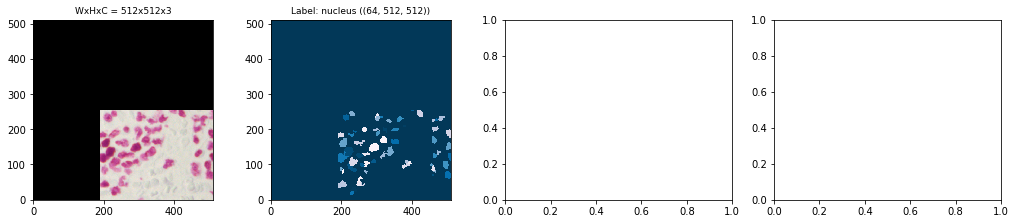

In [2]:
config['SOLVER']['IMS_PER_BATCH'] = 1
n_batch = 1

# Load some data
data_loader = maskflow.dataset.get_data_loader(config, data_dir, is_train=True)
some_data = [iter(data_loader).next() for _ in range(n_batch)]

# Retrieve category's names
categories = data_loader.dataset.coco.cats

for batch_image, batch_target, batch_idx in some_data:
    maskflow.viz.batch_display_top_masks(batch_image, batch_target, batch_idx, categories,
                                         basesize=14, limit=3, cmap="PuBu_r",
                                         pixel_mean=config['INPUT']['PIXEL_MEAN'],
                                         pixel_std=config['INPUT']['PIXEL_STD'])

## Training

In [3]:
# Use the last model in the model dir
# If False, create a new model from scratch.
# If `model_to_use` is set, we use this one instead.
use_last_model = True
model_to_use = None

# Configure the training
config['DATA_DIR'] = str(data_dir)

config['MODEL']['DEVICE'] = "cuda"

config['DATALOADER']['NUM_WORKERS'] = 4
config['SOLVER']['IMS_PER_BATCH'] = 1

config['SOLVER']['MAX_ITER'] = 2000
config['SOLVER']['BASE_LR'] = 0.00001
config['SOLVER']['STEPS'] = [800, 1800]
config['SOLVER']['CHECKPOINT_PERIOD'] = 200

#config['SOLVER']

In [4]:
# Setup training
training_args, current_model_path = maskflow.training.build_model(config,
                                                                  model_dir,
                                                                  use_last_model=use_last_model,
                                                                  model_to_use=model_to_use,
                                                                  use_pretrained_weights=True)

2018-11-04 17:58:46,608:INFO:root: Training model directory set: /home/hadim/.data/Neural_Network/Maskflow/Nucleus/Models/2018.11.04-17:31:08
2018-11-04 17:58:46,609:INFO:root: Building the model...
2018-11-04 17:58:49,183:INFO:maskrcnn_benchmark.utils.checkpoint: Loading checkpoint from /home/hadim/.data/Neural_Network/Maskflow/Nucleus/Models/2018.11.04-17:31:08/model_0000800.pth
2018-11-04 17:58:49,389:INFO:maskrcnn_benchmark.utils.checkpoint: Loading optimizer from /home/hadim/.data/Neural_Network/Maskflow/Nucleus/Models/2018.11.04-17:31:08/model_0000800.pth
2018-11-04 17:58:49,512:INFO:maskrcnn_benchmark.utils.checkpoint: Loading scheduler from /home/hadim/.data/Neural_Network/Maskflow/Nucleus/Models/2018.11.04-17:31:08/model_0000800.pth
2018-11-04 17:58:49,513:INFO:root: Create the data loader.


loading annotations into memory...


2018-11-04 17:58:49,871:INFO:root: Model ready to be use.


Done (t=0.33s)
creating index...
index created!


In [ ]:
# Train
from maskrcnn_benchmark.engine.trainer import do_train

logging.info(f"Start training at iteration {training_args['arguments']['iteration']}")
do_train(**training_args)

2018-11-04 17:58:59,513:INFO:root: Start training at iteration 800
2018-11-04 17:58:59,514:INFO:maskrcnn_benchmark.trainer: Start training
2018-11-04 17:59:00,238:INFO:maskrcnn_benchmark.trainer: eta: 0:14:25  iter: 800  loss: 0.6258 (0.6258)  loss_classifier: 0.0887 (0.0887)  loss_box_reg: 0.0905 (0.0905)  loss_mask: 0.1894 (0.1894)  loss_objectness: 0.0651 (0.0651)  loss_rpn_box_reg: 0.1922 (0.1922)  time: 0.7212 (0.7212)  data: 0.3124 (0.3124)  lr: 0.000500  max mem: 1675
2018-11-04 17:59:00,240:INFO:maskrcnn_benchmark.utils.checkpoint: Saving checkpoint to /home/hadim/.data/Neural_Network/Maskflow/Nucleus/Models/2018.11.04-17:31:08/model_0000800.pth
2018-11-04 17:59:11,363:INFO:maskrcnn_benchmark.trainer: eta: 0:11:05  iter: 820  loss: 0.5617 (0.5878)  loss_classifier: 0.0865 (0.1009)  loss_box_reg: 0.0742 (0.0927)  loss_mask: 0.1515 (0.1695)  loss_objectness: 0.0335 (0.0429)  loss_rpn_box_reg: 0.1492 (0.1818)  time: 0.5327 (0.5641)  data: 0.0079 (0.0678)  lr: 0.000500  max mem: 18